In [3]:
import os
import openai

openai.api_key = os.getenv('OPENAI_API_KEY')

# Embedding

In [4]:
# 获得一个字符串的 Embedding
embedding = openai.Embedding.create(input = "Hello", model="text-embedding-ada-002").data[0].embedding
print(len(embedding), embedding)

1536 [-0.02181987278163433, -0.00725163146853447, -0.02838272973895073, -0.024522989988327026, -0.023587295785546303, 0.028824584558606148, -0.012300482019782066, -0.00291429809294641, -0.00836926605552435, -0.005383491516113281, 0.02937040664255619, -0.003205078188329935, -0.015555919148027897, -0.0026917457580566406, 0.01231347769498825, -0.0009478778811171651, 0.03877933323383331, 0.005753870587795973, 0.0186878964304924, -0.013970436528325081, -0.019740551710128784, 0.009954748675227165, 0.005260031670331955, 0.009025552310049534, -0.008154836483299732, -0.005224293563514948, 0.0024545732885599136, -0.012345966883003712, 0.0033122929744422436, -0.015659885480999947, 0.0036940432619303465, -0.016166718676686287, -0.01788215897977352, -0.012904784642159939, 0.004077418241649866, -0.016218703240156174, -0.001089206663891673, -0.009857280179858208, 0.021300042048096657, -0.008564203046262264, 0.013080227188766003, -0.006280198693275452, 0.003245689906179905, -0.006764290388673544, -0.0

In [5]:
# 获得多个字符串的 Embeddings
embeddings = [data.embedding for data in openai.Embedding.create(input = ['Hi', 'Hello', '你好', '您好'], model="text-embedding-ada-002").data]
print(len(embeddings), embeddings)

4 [[-0.03631981089711189, -0.007161194458603859, -0.03343191742897034, -0.02887893281877041, -0.02687561884522438, 0.0342644639313221, -0.01223452016711235, -0.007922193966805935, 0.0019431489054113626, -0.0029968395829200745, 0.024690186604857445, -0.0023935690987855196, -0.005678222514688969, -0.002925292821601033, 0.006673374678939581, -0.0029675704427063465, 0.034004293382167816, -0.0014959807740524411, 0.021008772775530815, -0.009262071922421455, -0.021438054740428925, 0.010387309826910496, 0.006270110607147217, 0.007369331084191799, -0.012188990600407124, 0.0009813308715820312, 0.00568797904998064, -0.009919002652168274, -0.003109038108959794, -0.02445603348314762, 0.010549915954470634, -0.013828065246343613, -0.024417007341980934, -0.014075227081775665, 0.00238543888553977, -0.018849357962608337, 0.00033679892658255994, -0.011369453743100166, 0.017769649624824524, -0.009945020079612732, 0.013210159726440907, -0.011115787550807, -0.00934662763029337, -0.00970436166971922, -0.0265

# 情感分析

In [6]:

from openai.embeddings_utils import cosine_similarity, get_embedding

# 选择使用最小的ada模型
model = "text-embedding-ada-002"

# 获取"好评"和"差评"的
good_embedding = get_embedding("好评", engine=model)
bad_embedding = get_embedding("差评", engine=model)

good_example = get_embedding("买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质", engine=model)
bad_example = get_embedding("降价厉害，保价不合理，不推荐", engine=model)

def get_score(sample_embedding):
  print('1> ', cosine_similarity(sample_embedding, good_embedding))
  print('2> ', cosine_similarity(sample_embedding, bad_embedding))
  print('3> ', cosine_similarity(sample_embedding, good_embedding) - cosine_similarity(sample_embedding, bad_embedding))
  return cosine_similarity(sample_embedding, good_embedding) - cosine_similarity(sample_embedding, bad_embedding)

positive_score = get_score(good_example)
negative_score = get_score(bad_example)

print("好评例子的评分 : %f" % (positive_score))
print("差评例子的评分 : %f" % (negative_score))

1>  0.8044792856434143
2>  0.7634124590343881
3>  0.041066826609026164
1>  0.8046336148734683
2>  0.7988635578159189
3>  0.005770057057549405
好评例子的评分 : 0.041067
差评例子的评分 : 0.005770


## cosine_similarity

In [7]:

from openai.embeddings_utils import cosine_similarity, get_embedding

# 选择使用最小的ada模型
model = "text-embedding-ada-002"

# 获取"好评"和"差评"的
good_embedding = get_embedding("好", engine=model)
bad_embedding = get_embedding("坏", engine=model)
class_embeddings = (good_embedding, bad_embedding)

good_example = get_embedding("买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质", engine=model)
bad_example = get_embedding("降价厉害，保价不合理，不推荐", engine=model)

def get_score(embedding, class_embeddings):
  good_embedding, bad_embedding = class_embeddings
  return cosine_similarity(embedding, good_embedding) - cosine_similarity(embedding, bad_embedding)

print("好评例子的评分 : %f" % get_score(good_example, class_embeddings))
print("差评例子的评分 : %f" % get_score(bad_example, class_embeddings))

好评例子的评分 : 0.036712
差评例子的评分 : -0.026075


## distances_from_embeddings

In [8]:
import pandas as pd
from openai.embeddings_utils import distances_from_embeddings, get_embedding

# 选择使用最小的ada模型
model = "text-embedding-ada-002"

# 获取评价的 embedding
df_good_bad = pd.DataFrame({'evaluation': ['好', '坏']})
df_good_bad['embedding'] = df_good_bad['evaluation'].apply(lambda x: get_embedding(x, engine=model))

df_good_bad

,evaluation,embedding
0,好,"[-0.0005908940220251679, -0.03217872604727745,..."
1,坏,"[-0.01972219906747341, -0.0123455123975873, 0...."


In [9]:
comments = [
    '买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质',
    '降价厉害，保价不合理，不推荐',
]

df_comments = pd.DataFrame({'comment': comments, 'evaluation': ['', '']})
df_comments['embedding'] = df_comments['comment'].apply(lambda x: get_embedding(x, engine=model))
df_comments['evaluation'] = '' # 增加空列

df_comments

,comment,evaluation,embedding
0,买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精...,,"[0.004912952426820993, 0.004768066573888063, -..."
1,降价厉害，保价不合理，不推荐,,"[0.0022845088969916105, -0.016272293403744698,..."


In [10]:
for i, row in df_comments.iterrows():
    df_good_bad['distance'] = distances_from_embeddings(row['embedding'], df_good_bad['embedding'])
    df_comments.at[i, 'evaluation'] = df_good_bad.sort_values(by='distance', ascending=True)['evaluation'].values[0]

df_comments[['comment', 'evaluation']]

,comment,evaluation
0,买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精...,好
1,降价厉害，保价不合理，不推荐,坏


# Kaggle 提供的亚马逊耳机评论数据集

In [11]:
model = "text-embedding-ada-002"

def get_good_bad_embeddings(good='good', bad='bad', model=model):
    good_embedding = get_embedding(good, engine=model)
    bad_embedding = get_embedding(bad, engine=model)
    return [good_embedding, bad_embedding]

def is_good_bad(comment_embedding, good_bad_embeddings):
    good_embedding, bad_embedding = good_bad_embeddings
    return 'Good' if cosine_similarity(comment_embedding, good_embedding) - cosine_similarity(comment_embedding, bad_embedding)>0 else 'Bad'

In [12]:
# 加载数据
df_all_product_reviews = pd.read_csv('Datasets/AllProductReviews.csv')

# 随机抽取100条评论
df_product_reviews = df_all_product_reviews.sample(100).copy().reset_index(drop=True)

df_product_reviews

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Nice product\n,I like this product\n,5,boAt Rockerz 255
1,Perfect to Music Lovers in budget segment from...,"Excellent comfort , Crystal clear sound with b...",4,Sennheiser CX 6.0BT
2,Pls change this product\n,Sound & bass IS very lower\n,3,JBL T205BT
3,Change the design of the bud JBL\n,Best wireless earbuds in this range but still ...,3,JBL T205BT
4,Most comfortable headphones and there is noise...,Most comfortable headphones and there is noise...,5,Sennheiser CX 6.0BT
...,...,...,...,...
95,Wire is very thin\n,Sound is good but wire is very thin..\n,3,Sennheiser CX 6.0BT
96,Best for budget\n,"Best in the range, high quality product\n",5,JBL T205BT
97,Good\n,It is working fine now. But sound quality is n...,4,boAt Rockerz 255
98,Great product\n,Damn good product. Strictly not for people who...,5,Sennheiser CX 6.0BT


In [13]:
# 将评论标题和评论内容拼接起来生成 Embedding
df_product_reviews['embedding'] = df_product_reviews.apply(lambda x: get_embedding(x['ReviewTitle']+x['ReviewBody'], engine=model), axis=1)

df_product_reviews

,ReviewTitle,ReviewBody,ReviewStar,Product,embedding
0,Nice product\n,I like this product\n,5,boAt Rockerz 255,"[-0.005304429214447737, 0.012113340198993683, ..."
1,Perfect to Music Lovers in budget segment from...,"Excellent comfort , Crystal clear sound with b...",4,Sennheiser CX 6.0BT,"[0.007687255274504423, 0.012476037256419659, -..."
2,Pls change this product\n,Sound & bass IS very lower\n,3,JBL T205BT,"[0.006539094727486372, 0.0019558609928935766, ..."
3,Change the design of the bud JBL\n,Best wireless earbuds in this range but still ...,3,JBL T205BT,"[-0.0063516683876514435, 0.010334247723221779,..."
4,Most comfortable headphones and there is noise...,Most comfortable headphones and there is noise...,5,Sennheiser CX 6.0BT,"[-0.012175465933978558, 0.012291545048356056, ..."
...,...,...,...,...,...
95,Wire is very thin\n,Sound is good but wire is very thin..\n,3,Sennheiser CX 6.0BT,"[-0.01184348575770855, 0.00848092045634985, 0...."
96,Best for budget\n,"Best in the range, high quality product\n",5,JBL T205BT,"[0.011465340852737427, -0.000853865232784301, ..."
97,Good\n,It is working fine now. But sound quality is n...,4,boAt Rockerz 255,"[-0.004514759872108698, 0.0034031837712973356,..."
98,Great product\n,Damn good product. Strictly not for people who...,5,Sennheiser CX 6.0BT,"[-0.006765124853700399, 0.010717927478253841, ..."


In [14]:
df = df_product_reviews.copy()

In [15]:
good_bad_embeddings = get_good_bad_embeddings(good='good', bad='bad')

In [16]:
# 设置 pandas 显示所有列
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None
pd.options.display.width = None

def check_human_and_ai(review_star, review):
    return True if (review_star>=3 and review=='Good') or (review_star<3 and review=='Bad') else False

df_product_reviews['HumanReview'] = df_product_reviews['ReviewStar'].apply(lambda x: 'Good' if x>=3 else 'Bad')
df_product_reviews['AIReview'] = df_product_reviews['embedding'].apply(lambda x: is_good_bad(x, good_bad_embeddings))
df_product_reviews['Check_Human_AI'] = df_product_reviews.apply(lambda x: check_human_and_ai(x['ReviewStar'], x['AIReview']), axis=1)
df_product_reviews[['ReviewTitle', 'ReviewBody', 'ReviewStar', 'HumanReview', 'AIReview', 'Check_Human_AI']]

,ReviewTitle,ReviewBody,ReviewStar,HumanReview,AIReview,Check_Human_AI
0,Nice product\n,I like this product\n,5,Good,Good,True
1,Perfect to Music Lovers in budget segment from premium brand\n,"Excellent comfort , Crystal clear sound with beats, Nice design...Need stable build, tangling at times\n",4,Good,Good,True
2,Pls change this product\n,Sound & bass IS very lower\n,3,Good,Bad,False
3,Change the design of the bud JBL\n,Best wireless earbuds in this range but still I returned it because of the design. The bud design are damn uncomfortable and will give you a pain after a while as there is no rubber buds. Otherwise wonderful sound and bass is also pure\n,3,Good,Good,True
4,Most comfortable headphones and there is noise isolation\n,Most comfortable headphones and there is noise isolation. Sound will flow from your ears to your head that gives awesome feeling. Worth buy.\n,5,Good,Good,True
5,Four Stars\n,Good in ear for sports but have very bad wire quality\n,4,Good,Good,True
6,Awesome product\n,really like this product.\n,5,Good,Good,True
7,Good product\n,Osm\n,5,Good,Good,True
8,Quality product\n,Toooo good quality. Good sound... Not realy built for bass I guess...\n,4,Good,Good,True
9,Wrong choice\n,"Waste of money, people who all reviewed it as great seems they rated it for no good reason1. Sound quality is extremely poor and it feels like a local headphone which is sold in the market. NOT upto the mark.2. Battery drains in no time, charging hours compared to listening hours will be less.\n",1,Bad,Bad,True


In [17]:
# 结果统计
df_product_reviews['Check_Human_AI'].value_counts()

Check_Human_AI
True     84
False    16
Name: count, dtype: int64

              precision    recall  f1-score   support

         Bad       0.63      0.74      0.68        23
        Good       0.92      0.87      0.89        77

    accuracy                           0.84       100
   macro avg       0.77      0.80      0.79       100
weighted avg       0.85      0.84      0.84       100



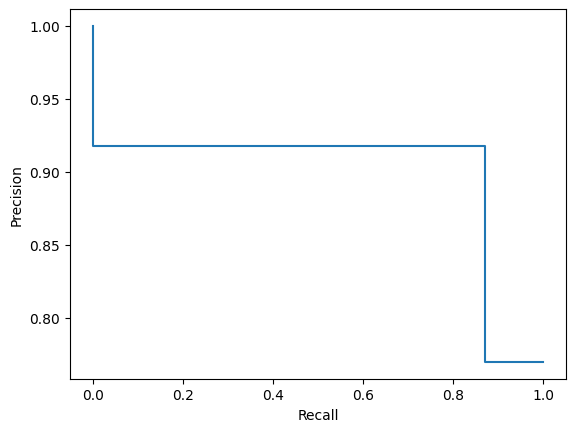

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_recall_curve, PrecisionRecallDisplay

# 评估
report = classification_report(df_product_reviews['HumanReview'], df_product_reviews['AIReview'])
print(report)

# 绘图不能使用字符串类型的数据，需要转换成数值类型
y_true = [1 if x=='Good' else 0 for x in df_product_reviews['HumanReview']]
y_pred = [1 if x=='Good' else 0 for x in df_product_reviews['AIReview']]

# 绘制 Precision-Recall 曲线
precision, recall, _ = precision_recall_curve(y_true, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

# 语义检索

In [19]:
df[['ReviewTitle', 'ReviewBody', 'ReviewStar']].head(10)

,ReviewTitle,ReviewBody,ReviewStar
0,Nice product\n,I like this product\n,5
1,Perfect to Music Lovers in budget segment from premium brand\n,"Excellent comfort , Crystal clear sound with beats, Nice design...Need stable build, tangling at times\n",4
2,Pls change this product\n,Sound & bass IS very lower\n,3
3,Change the design of the bud JBL\n,Best wireless earbuds in this range but still I returned it because of the design. The bud design are damn uncomfortable and will give you a pain after a while as there is no rubber buds. Otherwise wonderful sound and bass is also pure\n,3
4,Most comfortable headphones and there is noise isolation\n,Most comfortable headphones and there is noise isolation. Sound will flow from your ears to your head that gives awesome feeling. Worth buy.\n,5
5,Four Stars\n,Good in ear for sports but have very bad wire quality\n,4
6,Awesome product\n,really like this product.\n,5
7,Good product\n,Osm\n,5
8,Quality product\n,Toooo good quality. Good sound... Not realy built for bass I guess...\n,4
9,Wrong choice\n,"Waste of money, people who all reviewed it as great seems they rated it for no good reason1. Sound quality is extremely poor and it feels like a local headphone which is sold in the market. NOT upto the mark.2. Battery drains in no time, charging hours compared to listening hours will be less.\n",1


In [20]:
query_embedding = get_embedding('Best Bluetooth headset', engine=model)

In [21]:
def search_product(df, query_embedding, top_k=3):
    df['distance'] = distances_from_embeddings(query_embedding, df['embedding'])
    return df.sort_values(by='distance', ascending=True).head(top_k)

search_product(df, query_embedding)[['ReviewTitle', 'ReviewBody', 'ReviewStar', 'distance']]

,ReviewTitle,ReviewBody,ReviewStar,distance
56,Best in segment\n,"Best Bluetooth Earphone in Segment....Very comfortable, Bass & Sounds Quality is Great\n",5,0.123378
75,Wireless Headset with Amazing Battery Life & Sound\n,Using this since more than a month.Battery life is amazing. And sound quality is also good. Just go for it.\n,5,0.129806
72,Nice\n,Nice Headphone\n,5,0.143799


In [22]:
import faiss
import numpy as np

def load_faiss_index(df, column='embedding'):
    embeddings = df[column].tolist()
    embeddings = np.array(embeddings).astype('float32')
    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(embeddings)
    return index

index = load_faiss_index(df)

In [23]:
index.ntotal

100

In [24]:
distances, indexes = index.search(np.array(query_embedding).astype('float32').reshape(1, -1), k=3)
df.iloc[indexes[0]][['ReviewTitle', 'ReviewBody', 'ReviewStar']]

,ReviewTitle,ReviewBody,ReviewStar
56,Best in segment\n,"Best Bluetooth Earphone in Segment....Very comfortable, Bass & Sounds Quality is Great\n",5
75,Wireless Headset with Amazing Battery Life & Sound\n,Using this since more than a month.Battery life is amazing. And sound quality is also good. Just go for it.\n,5
72,Nice\n,Nice Headphone\n,5


# 距离计算 - 手动 和 Faiss

In [27]:
for _ in range(1000):
    search_product(df, query_embedding)

In [29]:
q = np.array(query_embedding).astype('float32').reshape(1, -1)
for _ in range(100000):
    index.search(q, k=3)

# 保存